In [1]:
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
% matplotlibinline


import warnings
warnings.filterwarnings('ignore')

import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.getcwd()

'/content'

In [4]:
heathcare_path = '/content/drive/MyDrive/My Projects/Health Care Domain-ECG/Health Care Domain/ECG_COVID19'
Abnormal_Heart_Beat_path = os.path.join(heathcare_path, 'Abnormal_Heart_Beat')
Covid19_Patients_path = os.path.join(heathcare_path, 'Covid19_Patients')
MI_History_path = os.path.join(heathcare_path, 'MI_History')
Myocardial_path = os.path.join(heathcare_path, 'Myocardial')
Normal_path = os.path.join(heathcare_path, 'Normal')

In [5]:
Abnormal_Heart_Beat = len(os.listdir(Abnormal_Heart_Beat_path))
Covid19_Patients = len(os.listdir(Covid19_Patients_path))
MI_History = len(os.listdir(MI_History_path))
Myocardial = len(os.listdir(Myocardial_path))
Normal = len(os.listdir(Normal_path))

# EDA

In [6]:
px.pie(names=['Abnormal_Heart_Beat', 'Covid19_Patients', 'MI_History', 'Myocardial', 'Normal'], values=[Abnormal_Heart_Beat, Covid19_Patients, MI_History, Myocardial, Normal])

In [7]:
fig = px.bar(x=['Abnormal_Heart_Beat', 'Covid19_Patients', 'MI_History', 'Myocardial', 'Normal'], y=[Abnormal_Heart_Beat, Covid19_Patients, MI_History, Myocardial, Normal], color=[Abnormal_Heart_Beat, Covid19_Patients, MI_History, Myocardial, Normal])
fig.update_layout(title='Class Distribution',xaxis=dict(title='Class'), yaxis=dict(title='Count'))
fig.show()

In [8]:
# total number of images
total = Abnormal_Heart_Beat + Covid19_Patients + MI_History + Myocardial + Normal
total

1932

In [9]:
Abnormal_Heart_Beat_img = (os.listdir(Abnormal_Heart_Beat_path))
Covid19_Patients_img = (os.listdir(Covid19_Patients_path))
MI_History_img = (os.listdir(MI_History_path))
Myocardial_img = (os.listdir(Myocardial_path))
Normal_img = (os.listdir(Normal_path))

In [10]:
Abnormal_Heart_Beat_img[:4]

['HB (222).jpg', 'HB   (33).jpg', 'HB   (6).jpg', 'HB   (123).jpg']

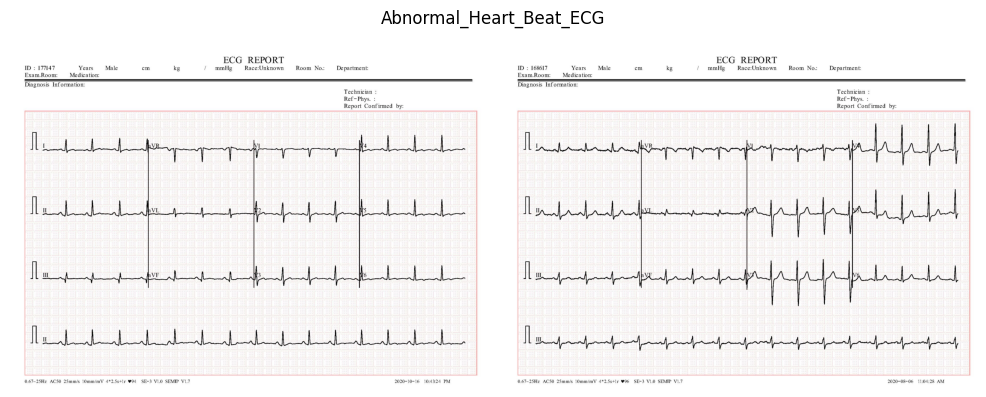

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
axes = ax.ravel()
for i,file in enumerate(Abnormal_Heart_Beat_img[:2]):
  fig.suptitle('Abnormal_Heart_Beat_ECG')
  img = cv2.imread(os.path.join(Abnormal_Heart_Beat_path, file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')
plt.tight_layout()
plt.show()

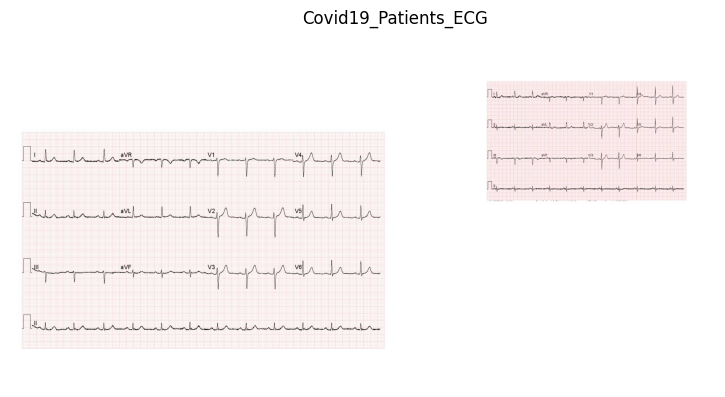

In [12]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
axes = ax.ravel()
for i,file in enumerate(Covid19_Patients_img[3:5]):
  fig.suptitle('Covid19_Patients_ECG')
  img = cv2.imread(os.path.join(Covid19_Patients_path, file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')
plt.tight_layout()
plt.show()

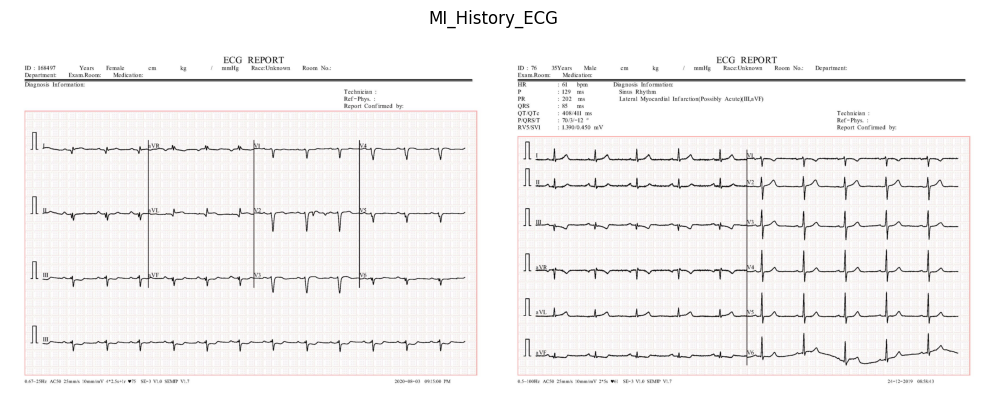

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
axes = ax.ravel()
for i,file in enumerate(MI_History_img[:2]):
  fig.suptitle('MI_History_ECG')
  img = cv2.imread(os.path.join(MI_History_path, file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')
plt.tight_layout()
plt.show()

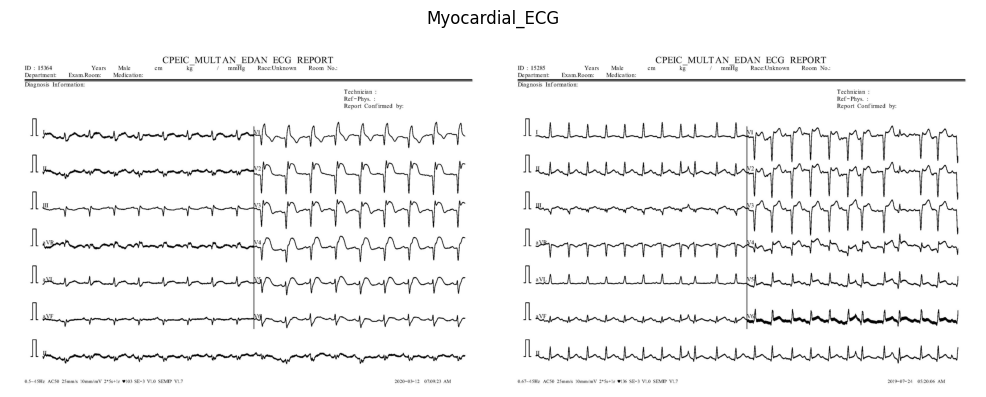

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
axes = ax.ravel()
for i,file in enumerate(Myocardial_img[:2]):
  fig.suptitle('Myocardial_ECG')
  img = cv2.imread(os.path.join(Myocardial_path, file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')
plt.tight_layout()
plt.show()

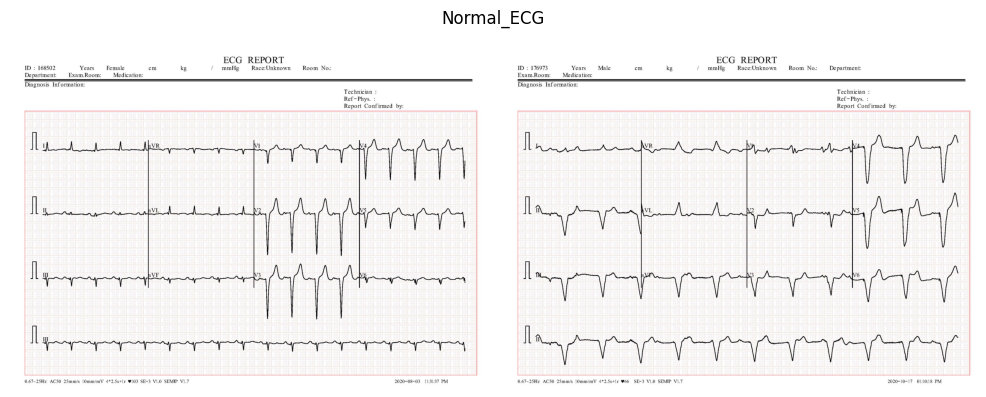

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10, 4))
axes = ax.ravel()
for i,file in enumerate(Normal_img[:2]):
  fig.suptitle('Normal_ECG')
  img = cv2.imread(os.path.join(Normal_path, file))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].axis('off')
plt.tight_layout()
plt.show()

# Image Preprocessing

In [16]:
def image_process(folder):
  images = []
  for i in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    images.append(img)
  return images

In [17]:
Abnormal_Heart_Beat_file = image_process(Abnormal_Heart_Beat_path)
Covid19_Patients_file = image_process(Covid19_Patients_path)
MI_History_file = image_process(MI_History_path)
Myocardial_file = image_process(Myocardial_path)
Normal_file = image_process(Normal_path)

In [18]:
Abnormal_Heart_Beat_file = np.array(Abnormal_Heart_Beat_file).reshape(-1,128, 128, 3)
Covid19_Patients_file = np.array(Covid19_Patients_file).reshape(-1,128, 128, 3)
MI_History_file = np.array(MI_History_file).reshape(-1,128, 128, 3)
Myocardial_file = np.array(Myocardial_file).reshape(-1,128, 128, 3)
Normal_file = np.array(Normal_file).reshape(-1,128, 128, 3)

In [19]:
Normal_file.shape

(859, 128, 128, 3)

In [20]:
independent_features = np.concatenate((Abnormal_Heart_Beat_file, Covid19_Patients_file, MI_History_file, Myocardial_file, Normal_file), axis=0)
independent_features.shape

(1932, 128, 128, 3)

In [21]:
# This is multiclass classification problem
Abnormal_Heart_Beat = 0
Covid19_Patients = 1
MI_History = 2
Myocardial = 3
Normal = 4

In [22]:
dependent_features = np.concatenate((np.zeros(Abnormal_Heart_Beat_file.shape[0]),np.ones(Covid19_Patients_file.shape[0]),np.ones(MI_History_file.shape[0])*2,np.ones(Myocardial_file.shape[0])*3,np.ones(Normal_file.shape[0])*4))

In [23]:
dependent_features

array([0., 0., 0., ..., 4., 4., 4.])

In [24]:
np.unique(dependent_features, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([546, 250, 203,  74, 859]))

In [25]:
dependent_features.shape

(1932,)

In [26]:
independent_features.shape

(1932, 128, 128, 3)

In [27]:
all_inpendent_features_flat = independent_features.reshape(-1,independent_features.shape[1]*independent_features.shape[2]*independent_features.shape[3])

In [28]:
all_inpendent_features_flat.shape

(1932, 49152)

In [29]:
x = all_inpendent_features_flat
y = dependent_features

In [30]:
x.shape

(1932, 49152)

In [31]:
y.shape

(1932,)

In [32]:
# so data set is imbalanced to make balanced
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [33]:
np.unique(y_smote, return_counts=True)

(array([0., 1., 2., 3., 4.]), array([859, 859, 859, 859, 859]))

In [34]:
total_data = 859*5
total_data

4295

# Model Building (Machine learning models)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

In [37]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [38]:
x_train = x_train / 255
x_test = x_test / 255

In [39]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.49      0.54       176
         1.0       0.99      0.98      0.99       170
         2.0       0.66      0.72      0.69       162
         3.0       0.85      0.80      0.82       161
         4.0       0.70      0.80      0.75       190

    accuracy                           0.76       859
   macro avg       0.76      0.76      0.76       859
weighted avg       0.76      0.76      0.75       859



In [41]:
print(confusion_matrix(y_test, y_pred))

[[ 86   1  36  15  38]
 [  0 167   2   0   1]
 [ 21   0 117   8  16]
 [ 10   0  13 128  10]
 [ 28   0  10   0 152]]


In [42]:
models = [RandomForestClassifier(n_jobs=-1), KNeighborsClassifier(),GradientBoostingClassifier()]
model_names = ['RandomForestClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
def model_test(model,x_train,x_test,y_train,y_test):
  accuracy_train = []
  accuracy_test = []
  model_name = []
  for i,mod in enumerate(models):
    model = mod.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_tr = accuracy_score(y_train,y_pred_train)
    accuracy_te = accuracy_score(y_test,y_pred_test)
    accuracy_train.append(accuracy_tr)
    accuracy_test.append(accuracy_te)
    model_name.append(model_names[i])
    dic = {"Model_Name":model_names,'Train_Accuracy':accuracy_tr,'Test_Accuracy':accuracy_te}
  x = dic
  df = pd.DataFrame(x)
  return df

In [43]:
# model_test(models,x_train,x_test,y_train,y_test)

In [44]:
# Results of all three models.

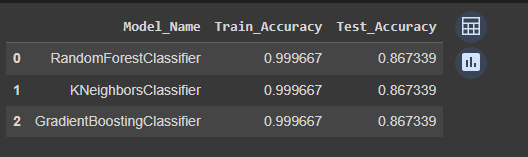

In [45]:
# from above i choose knnclassifier

In [46]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)
print('Classification Report for Test data set')
print(classification_report(y_test,y_pred_knn))
print("*"*25)
print('Confusion Matrix for Test data set')
print(confusion_matrix(y_test,y_pred_knn))

Classification Report for Test data set
              precision    recall  f1-score   support

         0.0       0.95      0.30      0.46       176
         1.0       0.91      0.98      0.95       170
         2.0       0.41      0.93      0.57       162
         3.0       0.68      0.99      0.81       161
         4.0       0.81      0.09      0.16       190

    accuracy                           0.64       859
   macro avg       0.75      0.66      0.59       859
weighted avg       0.76      0.64      0.58       859

*************************
Confusion Matrix for Test data set
[[ 53   9  84  28   2]
 [  0 167   3   0   0]
 [  1   7 151   2   1]
 [  0   0   1 159   1]
 [  2   0 126  45  17]]


In [47]:
y_pred_knn_train = model_knn.predict(x_train)
print('Classification Report for Train data set')
print(classification_report(y_train,y_pred_knn_train))
print("*"*25)
print('Confusion Matrix for Train data set')
print(confusion_matrix(y_train,y_pred_knn_train))

Classification Report for Train data set
              precision    recall  f1-score   support

         0.0       0.97      0.48      0.64       683
         1.0       0.92      0.98      0.95       689
         2.0       0.49      0.97      0.65       697
         3.0       0.80      0.98      0.88       698
         4.0       0.92      0.19      0.32       669

    accuracy                           0.73      3436
   macro avg       0.82      0.72      0.69      3436
weighted avg       0.82      0.73      0.69      3436

*************************
Confusion Matrix for Train data set
[[326  45 264  37  11]
 [  0 676  13   0   0]
 [  1  13 674   8   1]
 [  0   0  11 687   0]
 [ 10   0 402 127 130]]


# Model Building(Deep Learning Technique)

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [49]:
ANN_model = Sequential([
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(5,activation='softmax')
])
ANN_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = ANN_model.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=32)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.2005 - loss: 10.7504 - val_accuracy: 0.2006 - val_loss: 1.6098
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1976 - loss: 1.6095 - val_accuracy: 0.2006 - val_loss: 1.6102
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1953 - loss: 1.6393 - val_accuracy: 0.1657 - val_loss: 1.6105
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1916 - loss: 1.6094 - val_accuracy: 0.1657 - val_loss: 1.6106
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2084 - loss: 1.6091 - val_accuracy: 0.1657 - val_loss: 1.6109
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2091 - loss: 1.6090 - val_accuracy: 0.1657 - val_loss: 1.6109
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2111 - loss: 1.6095 - val_accuracy: 0.1657 - val_loss: 1.6109
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2050 - loss: 1.6092 - val_accuracy: 0.1657 - val_los

In [51]:
x_train.shape

(3436, 49152)

In [52]:
ANN_model.evaluate(x_test,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2138 - loss: 1.6100


[1.6102139949798584, 0.20488940179347992]

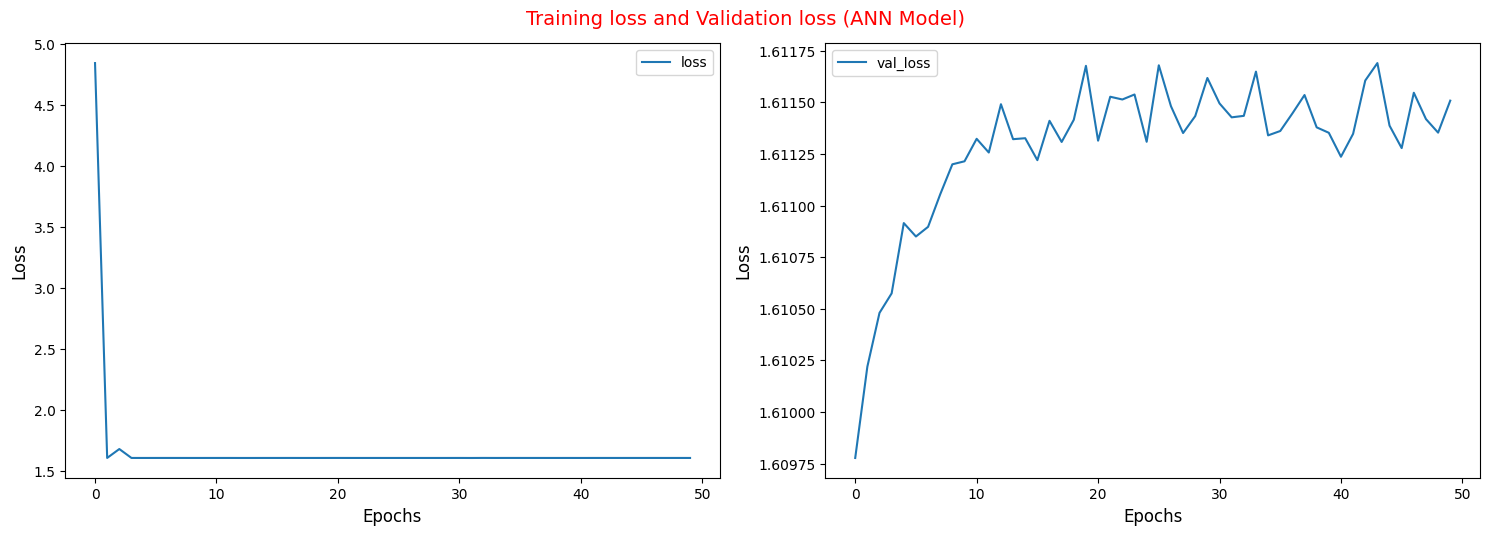

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.suptitle('Training loss and Validation loss (ANN Model)',fontsize=14,color='r')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.subplot(2,2,2)
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

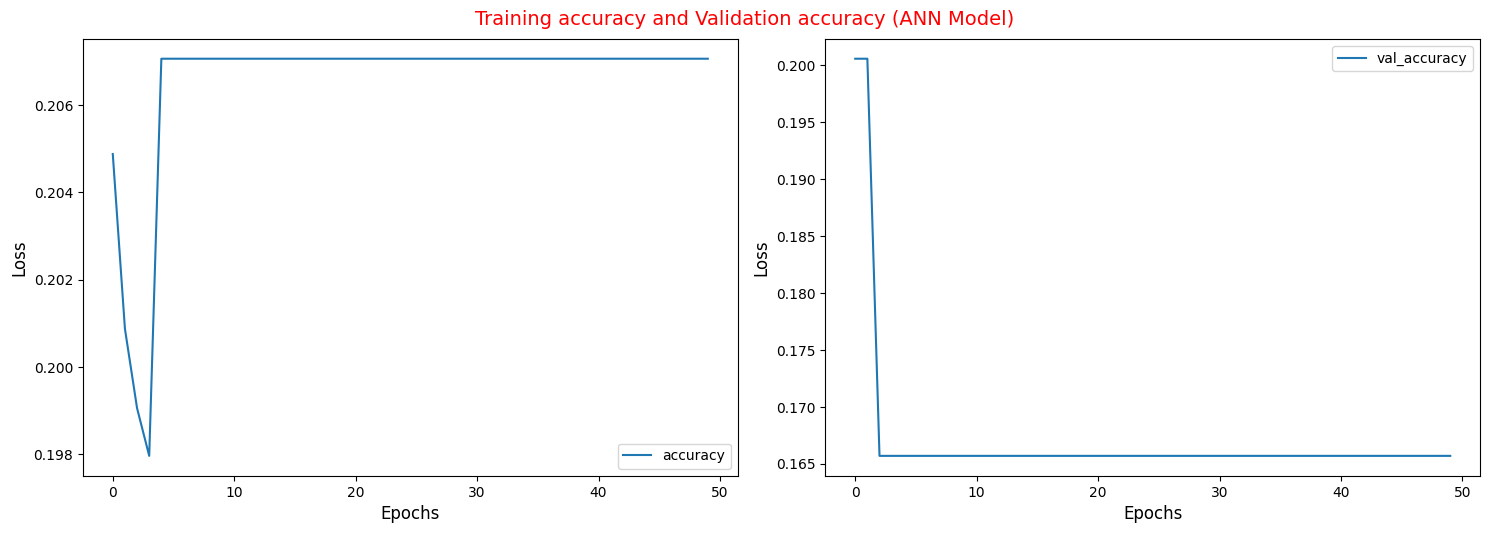

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.suptitle('Training accuracy and Validation accuracy (ANN Model)',fontsize=14,color='r')
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.subplot(2,2,2)
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Building the CNN model

In [55]:
model_cnn = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(5,activation='softmax')
    ])

In [56]:
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,420,229 (28.31 MB)

 Trainable params: 7,420,229 (28.31 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
hist_2 = model_cnn.fit(x_train.reshape(-1,128,128,3),y_train,epochs=50,validation_split=0.2,batch_size=32)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9268 - loss: 0.1878 - val_accuracy: 0.8576 - val_loss: 0.7665
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9315 - loss: 0.1757 - val_accuracy: 0.8488 - val_loss: 0.6720
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9449 - loss: 0.1543 - val_accuracy: 0.8561 - val_loss: 0.6797
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9271 - loss: 0.1595 - val_accuracy: 0.8547 - val_loss: 0.7123
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9431 - loss: 0.1494 - val_accuracy: 0.8503 - val_loss: 0.7957
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9303 - loss: 0.1740 - val_accuracy: 0.8488 - val_loss: 0.6980
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9408 - loss: 0.1476 - val_accuracy: 0.8503 - val_loss: 0.7811
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9352 - loss: 0.1486 - val_accuracy: 0.8430 - v

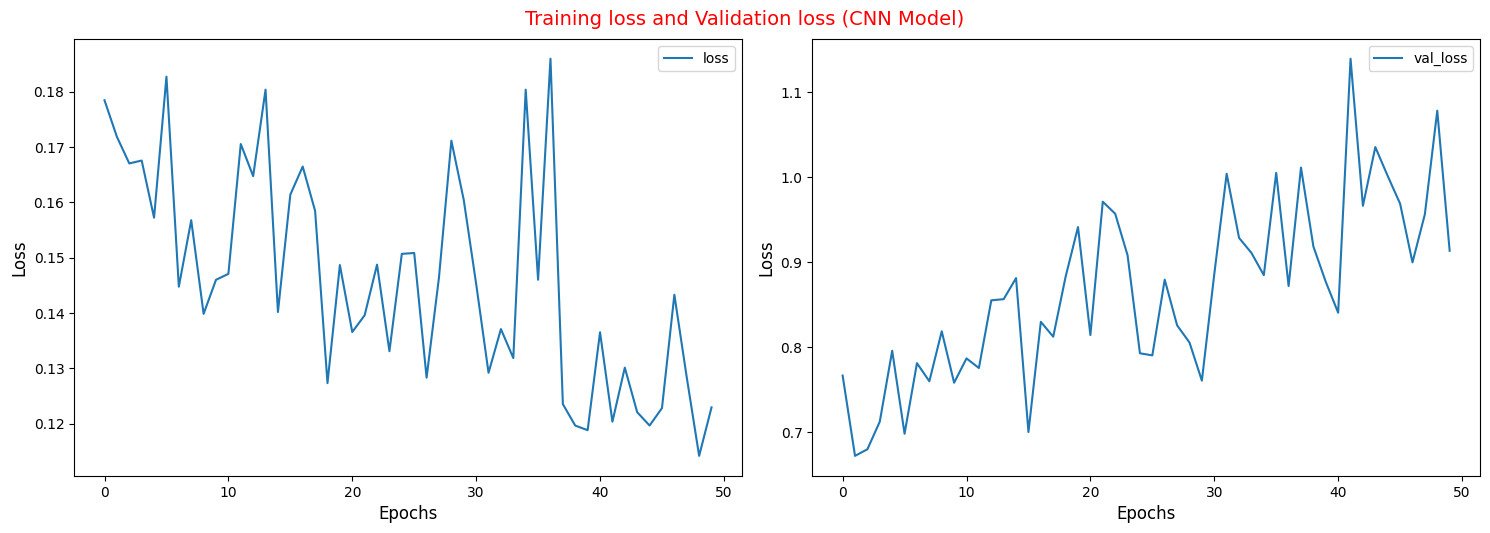

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.suptitle('Training loss and Validation loss (CNN Model)',fontsize=14,color='r')
plt.plot(hist_2.history['loss'],label='loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_2.history['val_loss'],label='val_loss')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

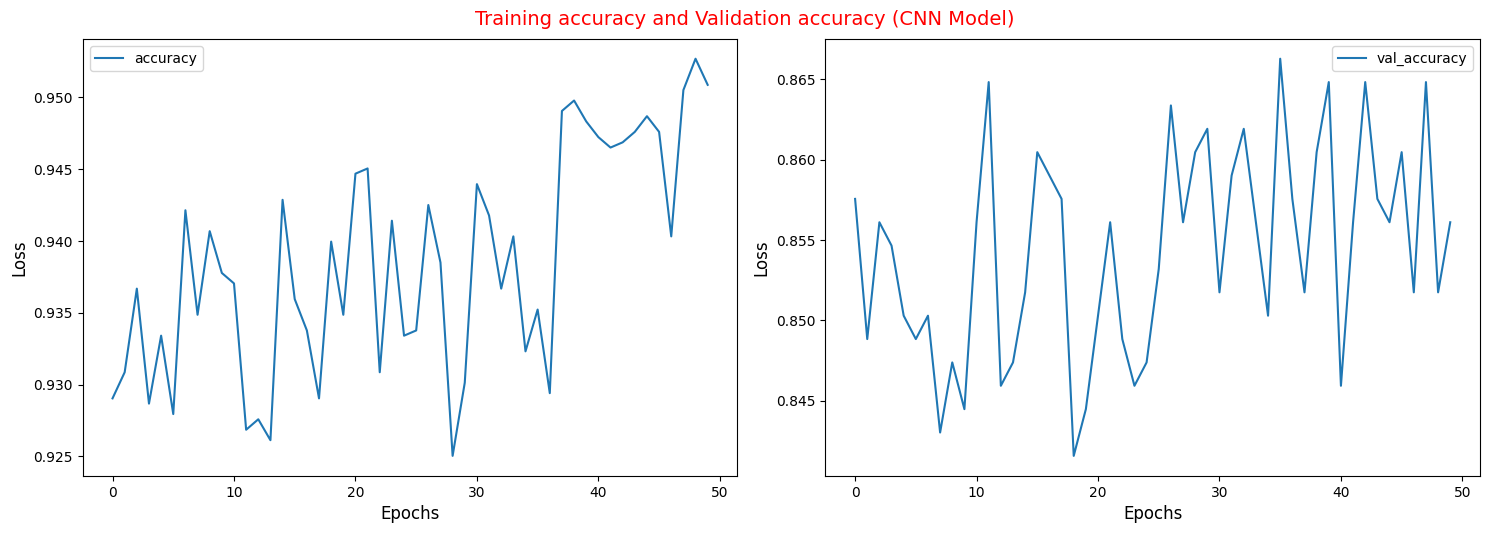

In [81]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.suptitle('Training accuracy and Validation accuracy (CNN Model)',fontsize=14,color='r')
plt.plot(hist_2.history['accuracy'],label='accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_2.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()